In [40]:
# 1 Apply K-Means to your dataset and store cluster labels.

import random
import math

# Sample dataset (2D points)
data = [
    [1, 2],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9, 11]
]

K = 2  # number of clusters

# Step 1: initialize centroids randomly
centroids = random.sample(data, K)

# Distance function
def distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

# K-Means loop
for _ in range(5):  # run few iterations
    clusters = [[] for _ in range(K)]

    # Step 2: assign points to nearest centroid
    for point in data:
        distances = [distance(point, c) for c in centroids]
        label = distances.index(min(distances))
        clusters[label].append(point)

    # Step 3: update centroids
    new_centroids = []
    for cluster in clusters:
        if cluster:
            mean_x = sum(p[0] for p in cluster) / len(cluster)
            mean_y = sum(p[1] for p in cluster) / len(cluster)
            new_centroids.append([mean_x, mean_y])
        else:
            new_centroids.append(random.choice(data))

    centroids = new_centroids

# Step 4: store cluster labels
labels = []
for point in data:
    distances = [distance(point, c) for c in centroids]
    labels.append(distances.index(min(distances)))

print("Final Centroids:", centroids)
print("Cluster Labels:", labels)


Final Centroids: [[7.333333333333333, 9.0], [1.1666666666666667, 1.4666666666666666]]
Cluster Labels: [1, 1, 0, 0, 1, 0]


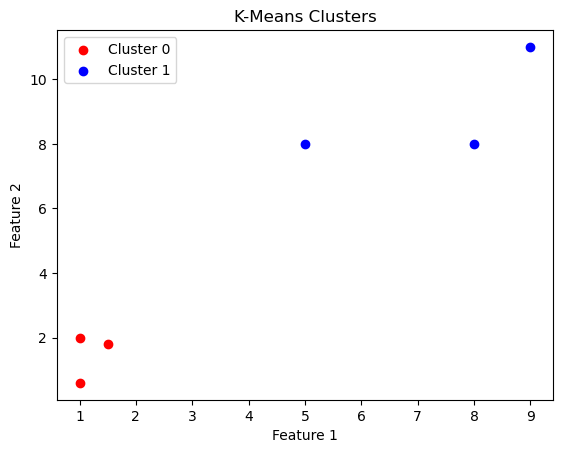

In [41]:
# 2 Plot clusters in the original feature space using different colors.
import matplotlib.pyplot as plt

# Original dataset (2D)
data = [
    [1, 2],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9, 11]
]

# Cluster labels from K-Means
labels = [0, 0, 1, 1, 0, 1]

# Step 1: Separate points by cluster
clusters = {}
for point, label in zip(data, labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(point)

# Step 2: Plot clusters in different colors
colors = ['red', 'blue', 'green', 'purple', 'orange']

plt.figure()
for label, points in clusters.items():
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    plt.scatter(x, y, color=colors[label], label=f'Cluster {label}')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clusters")
plt.legend()
plt.show()


In [42]:
# 3 Reduce dataset to 2D using PCA and store the transformed data.
import numpy as np

# Step 0: Original dataset with 3 features
data = np.array([
    [2, 0, 1],
    [3, 1, 2],
    [4, 2, 3],
    [8, 7, 6],
    [9, 8, 7],
    [7, 6, 5]
])

# Step 1: Center the data (subtract mean of each feature)
mean = np.mean(data, axis=0)
centered_data = data - mean

# Step 2: Compute covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvectors by descending eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Step 5: Take top 2 eigenvectors (to reduce to 2D)
top2 = eigenvectors_sorted[:, :2]

# Step 6: Project centered data onto top 2 eigenvectors
X_pca = centered_data.dot(top2)

# Step 7: Print results
print("Original Data (3 features):")
print(data)

print("\nCentered Data:")
print(centered_data)

print("\nTop 2 Eigenvectors:")
print(top2)

print("\nTransformed Data (2D):")
print(X_pca)


Original Data (3 features):
[[2 0 1]
 [3 1 2]
 [4 2 3]
 [8 7 6]
 [9 8 7]
 [7 6 5]]

Centered Data:
[[-3.5 -4.  -3. ]
 [-2.5 -3.  -2. ]
 [-1.5 -2.  -1. ]
 [ 2.5  3.   2. ]
 [ 3.5  4.   3. ]
 [ 1.5  2.   1. ]]

Top 2 Eigenvectors:
[[-0.57113776  0.08446887]
 [-0.67459057 -0.61502918]
 [-0.46768495  0.78396691]]

Transformed Data (2D):
[[ 6.10039932 -0.18742504]
 [ 4.38698603  0.06598155]
 [ 2.67357274  0.31938815]
 [-4.38698603 -0.06598155]
 [-6.10039932  0.18742504]
 [-2.67357274 -0.31938815]]


centroids: [[4.38698603, 0.06598155333333333], [-4.38698603, -0.06598155333333333]]


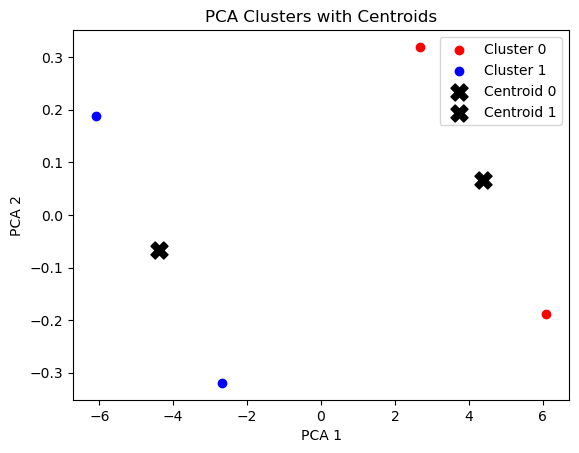

In [43]:
# 4 Plot PCA clusters and mark the centroid positions.
import matplotlib.pyplot as plt
import random
import math

# Step 0: Sample 2D PCA-transformed data
pca_data =  [[6.10039932, -0.18742504],
 [ 4.38698603  ,0.06598155],
 [ 2.67357274 , 0.31938815],
 [-4.38698603 ,-0.06598155],
 [-6.10039932 , 0.18742504],
 [-2.67357274 ,-0.31938815]]

# Step 1: K-Means parameters
K = 2  # number of clusters

# Initialize centroids randomly
centroids = random.sample(pca_data, K)

# Distance function
def distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

# K-Means loop
for _ in range(5):  # simple 5 iterations
    clusters = [[] for _ in range(K)]
    for point in pca_data:
        dists = [distance(point, c) for c in centroids]
        label = dists.index(min(dists))
        clusters[label].append(point)
    # Update centroids
    new_centroids = []
    for cluster in clusters:
        if cluster:
            mean_x = sum(p[0] for p in cluster)/len(cluster)
            mean_y = sum(p[1] for p in cluster)/len(cluster)
            new_centroids.append([mean_x, mean_y])
        else:
            new_centroids.append(random.choice(pca_data))
    centroids = new_centroids
print("centroids:",centroids)
# Step 2: Store cluster labels
labels = []
for point in pca_data:
    dists = [distance(point, c) for c in centroids]
    labels.append(dists.index(min(dists)))

# Step 3: Plot clusters and centroids
colors = ['red', 'blue', 'green', 'purple']

plt.figure()
for k in range(K):
    cluster_points = [pca_data[i] for i in range(len(pca_data)) if labels[i]==k]
    x = [p[0] for p in cluster_points]
    y = [p[1] for p in cluster_points]
    plt.scatter(x, y, color=colors[k], label=f'Cluster {k}')

# Mark centroids
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], color='black', marker='X', s=150, label=f'Centroid {i}')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Clusters with Centroids")
plt.legend()
plt.show()


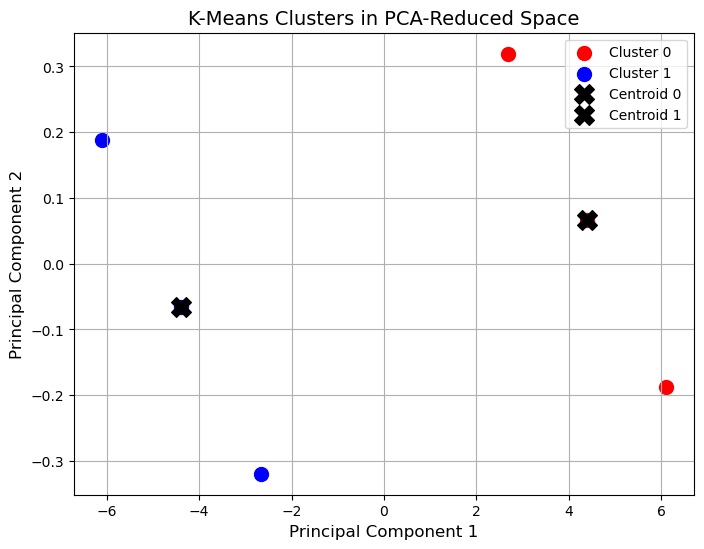

In [44]:
# 5 Add legends, titles, and axis labels to make the visualization clean.
import matplotlib.pyplot as plt
import random
import math

# Sample 2D PCA-transformed data
pca_data =  [[6.10039932, -0.18742504],
 [ 4.38698603  ,0.06598155],
 [ 2.67357274 , 0.31938815],
 [-4.38698603 ,-0.06598155],
 [-6.10039932 , 0.18742504],
 [-2.67357274 ,-0.31938815]]
# K-Means parameters
K = 2

# Initialize centroids randomly
centroids = random.sample(pca_data, K)

# Distance function
def distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

# K-Means loop
for _ in range(5):
    clusters = [[] for _ in range(K)]
    for point in pca_data:
        dists = [distance(point, c) for c in centroids]
        label = dists.index(min(dists))
        clusters[label].append(point)
    # Update centroids
    new_centroids = []
    for cluster in clusters:
        if cluster:
            mean_x = sum(p[0] for p in cluster)/len(cluster)
            mean_y = sum(p[1] for p in cluster)/len(cluster)
            new_centroids.append([mean_x, mean_y])
        else:
            new_centroids.append(random.choice(pca_data))
    centroids = new_centroids

# Store cluster labels
labels = []
for point in pca_data:
    dists = [distance(point, c) for c in centroids]
    labels.append(dists.index(min(dists)))

# Colors for clusters
colors = ['red', 'blue', 'green', 'purple']

# Plot clusters
plt.figure(figsize=(8,6))
for k in range(K):
    cluster_points = [pca_data[i] for i in range(len(pca_data)) if labels[i]==k]
    x = [p[0] for p in cluster_points]
    y = [p[1] for p in cluster_points]
    plt.scatter(x, y, color=colors[k], label=f'Cluster {k}', s=100)

# Plot centroids
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], color='black', marker='X', s=200, label=f'Centroid {i}')

# Add labels, title, legend
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.title("K-Means Clusters in PCA-Reduced Space", fontsize=14)
plt.legend()
plt.grid(True)  # optional grid for clarity
plt.show()


In [45]:
# 6 Compare clustering before PCA vs after PCA by computing cluster separation distance.
import math
import random

# Sample original dataset (3D features)
data_original = [
   [2, 0, 1],
    [3, 1, 2],
    [4, 2, 3],
    [8, 7, 6],
    [9, 8, 7],
    [7, 6, 5]]

# PCA-reduced dataset (2D)
data_pca =  [[6.10039932, -0.18742504],
 [ 4.38698603  ,0.06598155],
 [ 2.67357274 , 0.31938815],
 [-4.38698603 ,-0.06598155],
 [-6.10039932 , 0.18742504],
 [-2.67357274 ,-0.31938815]]

K = 2  # number of clusters

# Distance function
def distance(p1, p2):
    return math.sqrt(sum((a-b)**2 for a,b in zip(p1,p2)))

# Simple K-Means function (returns centroids)
def kmeans(data, K, iterations=5):
    centroids = random.sample(data, K)
    for _ in range(iterations):
        clusters = [[] for _ in range(K)]
        for point in data:
            dists = [distance(point, c) for c in centroids]
            label = dists.index(min(dists))
            clusters[label].append(point)
        new_centroids = []
        for cluster in clusters:
            if cluster:
                mean = [sum(p[i] for p in cluster)/len(cluster) for i in range(len(cluster[0]))]
                new_centroids.append(mean)
            else:
                new_centroids.append(random.choice(data))
        centroids = new_centroids
    return centroids

# Step 1: Run K-Means on original data
centroids_original = kmeans(data_original, K)

# Step 2: Run K-Means on PCA-reduced data
centroids_pca = kmeans(data_pca, K)

# Step 3: Compute cluster separation distance (distance between centroids)
def cluster_separation(centroids):
    max_dist = 0
    for i in range(len(centroids)):
        for j in range(i+1, len(centroids)):
            d = distance(centroids[i], centroids[j])
            if d > max_dist:
                max_dist = d
    return max_dist

sep_original = cluster_separation(centroids_original)
sep_pca = cluster_separation(centroids_pca)

print("Centroids (Original Data):", centroids_original)
print("Centroids (PCA Data):", centroids_pca)
print("Cluster Separation (Original Data):", sep_original)
print("Cluster Separation (PCA Data):", sep_pca)


Centroids (Original Data): [[8.0, 7.0, 6.0], [3.0, 1.0, 2.0]]
Centroids (PCA Data): [[4.38698603, 0.06598155333333333], [-4.38698603, -0.06598155333333333]]
Cluster Separation (Original Data): 8.774964387392123
Cluster Separation (PCA Data): 8.77496438575005
